In [80]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context(context='paper')

%matplotlib inline

from census import Census
from us import states

In [81]:
c = Census("7deb96b03ae11f23a2fb544839ee195ccd646ac3")


## Data Preparation

[ACS 5Yr page on the census website](https://www.census.gov/data/developers/data-sets/acs-5year.html)

[Detailed Tables](https://api.census.gov/data/2021/acs/acs5/variables.html)


Target Tract ID : 118.01, 10.02, 6.01

### Get Data

In [82]:
atlanta_census_2022 = c.acs5.state_county_tract(fields = ('NAME', 'B01001_001E','B01001A_001E', 'B01001B_001E', 'B06011_001E', 'B05010_002E', 'B17001_001E', 'B17001_002E', 'B25077_001E'),
                                                state_fips = states.GA.fips,
                                                county_fips = "*",
                                                tract = "*",
                                                year = 2021)

atlanta_census_2014 = c.acs5.state_county_tract(fields = ('NAME', 'B01001_001E','B01001A_001E', 'B01001B_001E', 'B06011_001E', 'B05010_002E', 'B17001_001E', 'B17001_002E', 'B25077_001E'),
                                                state_fips = states.GA.fips,
                                                county_fips = "*",
                                                tract = "*",
                                                year = 2014)

In [83]:
at_df_2022 = pd.DataFrame(atlanta_census_2022)
at_df_2022["GEOID"] = at_df_2022["state"] + at_df_2022["county"] + at_df_2022["tract"]

at_df_2014 = pd.DataFrame(atlanta_census_2014)
at_df_2014["GEOID"] = at_df_2014["state"] + at_df_2014["county"] + at_df_2014["tract"]

### Tiger Map (2022)

In [84]:
atlanta_council_district = gpd.read_file("Official_City_Council_Districts_(Current).zip")
atlanta_council_district = atlanta_council_district.to_crs(epsg=4326)
atlanta_citylimits = atlanta_council_district.unary_union
atlanta_citylimits = gpd.GeoDataFrame(geometry=[atlanta_citylimits], crs=atlanta_council_district.crs)

tracts_2022 = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2022/TRACT/tl_2022_13_tract.zip")
tracts_2022 = tracts_2022.to_crs(epsg=4326)

tracts_2014 = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2014/TRACT/tl_2014_13_tract.zip")
tracts_2014 = tracts_2014.to_crs(epsg=4326)

In [85]:
at_census_geo_2021 = tracts_2022.merge(at_df_2022, left_on = 'GEOID', right_on = 'GEOID')
at_census_geo_2014 = tracts_2014.merge(at_df_2014, left_on = 'GEOID', right_on = 'GEOID')

<Axes: >

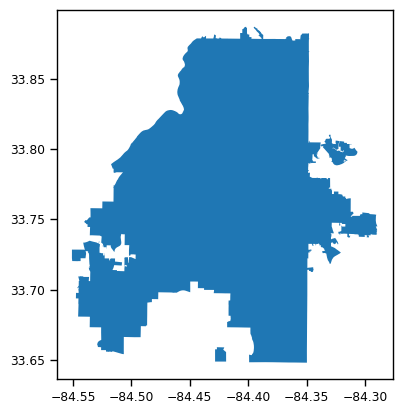

In [86]:
atlanta_citylimits.plot()

In [87]:
atlanta_tracts_2021 = tracts_2022[tracts_2022.intersects(atlanta_citylimits.unary_union)]
atlanta_tracts_2014 = tracts_2014[tracts_2014.intersects(atlanta_citylimits.unary_union)]
intersection_geo_2021 = at_census_geo_2021.merge(atlanta_tracts_2021[['GEOID']], on='GEOID', how='inner')
intersection_geo_2014 = at_census_geo_2014.merge(atlanta_tracts_2014[['GEOID']], on='GEOID', how='inner')

In [88]:
desired_columns = [
    'GEOID', 'geometry', 
    'B01001_001E', 'B01001A_001E', 
    'B01001B_001E', 'B06011_001E', 
    'B05010_002E', 'B17001_001E', 'B17001_002E', 'B25077_001E'
]
atlanta_geo_2021 = intersection_geo_2021[desired_columns]
atlanta_geo_2014 = intersection_geo_2014[desired_columns]

atlanta_geo_2021.head()

,GEOID,geometry,B01001_001E,B01001A_001E,B01001B_001E,B06011_001E,B05010_002E,B17001_001E,B17001_002E,B25077_001E
0,13121006601,"POLYGON ((-84.42910 33.70162, -84.42903 33.702...",1742.0,390.0,1195.0,30625.0,196.0,1735.0,478.0,214200.0
1,13063040309,"POLYGON ((-84.36541 33.64812, -84.36540 33.648...",3185.0,942.0,2087.0,21394.0,32.0,3185.0,716.0,-666666666.0
2,13089021405,"POLYGON ((-84.34839 33.85263, -84.34831 33.853...",4836.0,3865.0,196.0,84273.0,22.0,4836.0,201.0,651400.0
3,13089021502,"POLYGON ((-84.34852 33.82487, -84.34852 33.824...",4343.0,2735.0,779.0,54028.0,0.0,4343.0,435.0,442400.0
4,13089022401,"POLYGON ((-84.34862 33.78383, -84.34858 33.784...",4194.0,3166.0,138.0,65068.0,22.0,4035.0,310.0,612600.0


In [89]:
atlanta_geo_2014.head()

,GEOID,geometry,B01001_001E,B01001A_001E,B01001B_001E,B06011_001E,B05010_002E,B17001_001E,B17001_002E,B25077_001E
0,13089021504,"POLYGON ((-84.33887 33.79995, -84.33855 33.800...",4921.0,3932.0,372.0,28879.0,100.0,4622.0,1213.0,336300.0
1,13121006601,"POLYGON ((-84.42925 33.70047, -84.42911 33.701...",2413.0,410.0,1955.0,14982.0,180.0,2395.0,927.0,90400.0
2,13121006700,"POLYGON ((-84.40363 33.70304, -84.40359 33.703...",3837.0,295.0,3453.0,15362.0,270.0,3837.0,1700.0,84000.0
3,13121009300,"POLYGON ((-84.39027 33.81494, -84.39025 33.815...",4449.0,4068.0,307.0,56827.0,30.0,4449.0,185.0,437900.0
4,13121009402,"POLYGON ((-84.37392 33.81582, -84.37383 33.815...",5115.0,3284.0,935.0,39608.0,181.0,5115.0,745.0,164200.0


2022 Target GEOID (Tracts) : 13121001002, (13121011801, 13121011802), 13121000700, (13121000601, 13121000602), (13121008905, 13121008909, 13121008908), (13121009001, 13121009002)

In [90]:
intersection_geo_2014.explore()

2014 Target GEOID (Tracts) : 13121011800, 13121000700, 13121001002, 13121000600, 13121008902, 13121009000

Compare 2014 and 2022

Variables :

1. Total Population : B01001_001E
2. White Alone Population : B01001A_001E
3. Black or African American Alone : B01001B_001E
4. Median Income : B06011_001E
5. RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS : B05010_002E

In [91]:
abbreviated_rename_mapping = {
    'B01001_001E': 'tot_pop',
    'B01001A_001E': 'white_pop',
    'B01001B_001E': 'black_pop',
    'B06011_001E': 'med_income',
    'B05010_002E': 'ratio_poverty',
    'B17001_001E': 'total_poverty', 
    'B17001_002E': 'poverty_below100', 
    'B25077_001E': 'Med_homevalue'
}

# Applying the abbreviated renaming
atlanta_geo_2022 = atlanta_geo_2021.rename(columns=abbreviated_rename_mapping)
atlanta_geo_2014 = atlanta_geo_2014.rename(columns=abbreviated_rename_mapping)

In [92]:
atlanta_geo_2022

,GEOID,geometry,tot_pop,white_pop,black_pop,med_income,ratio_poverty,total_poverty,poverty_below100,Med_homevalue
0,13121006601,"POLYGON ((-84.42910 33.70162, -84.42903 33.702...",1742.0,390.0,1195.0,30625.0,196.0,1735.0,478.0,214200.0
1,13063040309,"POLYGON ((-84.36541 33.64812, -84.36540 33.648...",3185.0,942.0,2087.0,21394.0,32.0,3185.0,716.0,-666666666.0
2,13089021405,"POLYGON ((-84.34839 33.85263, -84.34831 33.853...",4836.0,3865.0,196.0,84273.0,22.0,4836.0,201.0,651400.0
3,13089021502,"POLYGON ((-84.34852 33.82487, -84.34852 33.824...",4343.0,2735.0,779.0,54028.0,0.0,4343.0,435.0,442400.0
4,13089022401,"POLYGON ((-84.34862 33.78383, -84.34858 33.784...",4194.0,3166.0,138.0,65068.0,22.0,4035.0,310.0,612600.0
...,...,...,...,...,...,...,...,...,...,...
217,13121006500,"POLYGON ((-84.41829 33.72655, -84.41750 33.727...",3377.0,820.0,2307.0,34360.0,319.0,3329.0,673.0,212300.0
218,13121008602,"POLYGON ((-84.50784 33.79560, -84.50773 33.795...",1539.0,91.0,1318.0,23150.0,216.0,1539.0,427.0,151600.0
219,13121007500,"POLYGON ((-84.42948 33.69799, -84.42946 33.698...",3228.0,307.0,2774.0,17205.0,171.0,3194.0,848.0,151900.0
220,13121006000,"POLYGON ((-84.44735 33.73454, -84.44720 33.735...",3438.0,417.0,2871.0,27660.0,313.0,3438.0,710.0,294500.0


In [93]:
atlanta_geo_2014

,GEOID,geometry,tot_pop,white_pop,black_pop,med_income,ratio_poverty,total_poverty,poverty_below100,Med_homevalue
0,13089021504,"POLYGON ((-84.33887 33.79995, -84.33855 33.800...",4921.0,3932.0,372.0,28879.0,100.0,4622.0,1213.0,336300.0
1,13121006601,"POLYGON ((-84.42925 33.70047, -84.42911 33.701...",2413.0,410.0,1955.0,14982.0,180.0,2395.0,927.0,90400.0
2,13121006700,"POLYGON ((-84.40363 33.70304, -84.40359 33.703...",3837.0,295.0,3453.0,15362.0,270.0,3837.0,1700.0,84000.0
3,13121009300,"POLYGON ((-84.39027 33.81494, -84.39025 33.815...",4449.0,4068.0,307.0,56827.0,30.0,4449.0,185.0,437900.0
4,13121009402,"POLYGON ((-84.37392 33.81582, -84.37383 33.815...",5115.0,3284.0,935.0,39608.0,181.0,5115.0,745.0,164200.0
...,...,...,...,...,...,...,...,...,...,...
161,13121009200,"POLYGON ((-84.37767 33.80897, -84.37765 33.809...",6577.0,4362.0,1228.0,42451.0,720.0,6577.0,1846.0,305200.0
162,13121007500,"POLYGON ((-84.42886 33.69790, -84.42884 33.698...",3435.0,160.0,2990.0,11909.0,431.0,3435.0,1624.0,73600.0
163,13121006000,"POLYGON ((-84.44735 33.73454, -84.44720 33.735...",3083.0,150.0,2903.0,14353.0,465.0,3083.0,1278.0,97400.0
164,13121008101,"POLYGON ((-84.46563 33.73891, -84.46113 33.738...",1165.0,10.0,1155.0,11083.0,99.0,1158.0,340.0,71600.0


## Analysis on Target Area (Including Uppere West Side Research Area)

In [94]:
selected_geoids = [
    '13121001002', 
    '13121011801', '13121011802', 
    '13121000700', 
    '13121000601', '13121000602', 
    '13121008905', '13121008909', '13121008908', 
    '13121009001', '13121009002'
]

target_2022 = atlanta_geo_2022[atlanta_geo_2022['GEOID'].isin(selected_geoids)]

In [95]:
target_2022

,GEOID,geometry,tot_pop,white_pop,black_pop,med_income,ratio_poverty,total_poverty,poverty_below100,Med_homevalue
27,13121008905,"POLYGON ((-84.43876 33.81046, -84.43796 33.809...",5173.0,3339.0,1057.0,75736.0,0.0,5173.0,294.0,431100.0
28,13121000601,"POLYGON ((-84.41529 33.78408, -84.41526 33.784...",4315.0,2262.0,917.0,27704.0,0.0,3145.0,1062.0,367700.0
29,13121011802,"POLYGON ((-84.41739 33.77015, -84.41739 33.770...",1227.0,205.0,901.0,15529.0,0.0,1225.0,497.0,234600.0
33,13121008909,"POLYGON ((-84.42694 33.81034, -84.42685 33.810...",1635.0,1287.0,270.0,87907.0,0.0,1635.0,40.0,205700.0
43,13121000602,"POLYGON ((-84.40765 33.78859, -84.40653 33.789...",3407.0,1367.0,778.0,32201.0,0.0,3378.0,1414.0,211400.0
130,13121008908,"POLYGON ((-84.41597 33.80019, -84.41593 33.800...",2610.0,598.0,1962.0,42980.0,108.0,2610.0,705.0,321200.0
131,13121009002,"POLYGON ((-84.42382 33.82492, -84.42374 33.824...",2876.0,2608.0,20.0,133250.0,0.0,2876.0,36.0,836800.0
132,13121009001,"POLYGON ((-84.41874 33.81019, -84.41836 33.810...",2007.0,1260.0,454.0,49512.0,0.0,2007.0,134.0,600000.0
158,13121011801,"POLYGON ((-84.41737 33.77220, -84.41737 33.773...",421.0,165.0,173.0,47978.0,0.0,421.0,71.0,-666666666.0
170,13121001002,"POLYGON ((-84.41297 33.77993, -84.41243 33.779...",7673.0,3394.0,1995.0,5576.0,0.0,1174.0,412.0,-666666666.0


In [96]:
target_2022['Med_homevalue'] = pd.to_numeric(target_2022['Med_homevalue'])
mean_homevalue = target_2022[target_2022['Med_homevalue'] > 0]['Med_homevalue'].mean()
target_2022['Med_homevalue'] = np.where(target_2022['Med_homevalue'] < 0, mean_homevalue, target_2022['Med_homevalue'])

c:\Users\synnp\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\synnp\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [97]:
target_2022

,GEOID,geometry,tot_pop,white_pop,black_pop,med_income,ratio_poverty,total_poverty,poverty_below100,Med_homevalue
27,13121008905,"POLYGON ((-84.43876 33.81046, -84.43796 33.809...",5173.0,3339.0,1057.0,75736.0,0.0,5173.0,294.0,431100.000000
28,13121000601,"POLYGON ((-84.41529 33.78408, -84.41526 33.784...",4315.0,2262.0,917.0,27704.0,0.0,3145.0,1062.0,367700.000000
29,13121011802,"POLYGON ((-84.41739 33.77015, -84.41739 33.770...",1227.0,205.0,901.0,15529.0,0.0,1225.0,497.0,234600.000000
33,13121008909,"POLYGON ((-84.42694 33.81034, -84.42685 33.810...",1635.0,1287.0,270.0,87907.0,0.0,1635.0,40.0,205700.000000
43,13121000602,"POLYGON ((-84.40765 33.78859, -84.40653 33.789...",3407.0,1367.0,778.0,32201.0,0.0,3378.0,1414.0,211400.000000
130,13121008908,"POLYGON ((-84.41597 33.80019, -84.41593 33.800...",2610.0,598.0,1962.0,42980.0,108.0,2610.0,705.0,321200.000000
131,13121009002,"POLYGON ((-84.42382 33.82492, -84.42374 33.824...",2876.0,2608.0,20.0,133250.0,0.0,2876.0,36.0,836800.000000
132,13121009001,"POLYGON ((-84.41874 33.81019, -84.41836 33.810...",2007.0,1260.0,454.0,49512.0,0.0,2007.0,134.0,600000.000000
158,13121011801,"POLYGON ((-84.41737 33.77220, -84.41737 33.773...",421.0,165.0,173.0,47978.0,0.0,421.0,71.0,397422.222222
170,13121001002,"POLYGON ((-84.41297 33.77993, -84.41243 33.779...",7673.0,3394.0,1995.0,5576.0,0.0,1174.0,412.0,397422.222222


In [101]:
merge_mapping = {
    ('13121011801', '13121011802'): '13121011800',
    ('13121000601', '13121000602'): '13121000600',
    ('13121008905', '13121008909', '13121008908'): '13121008902',
    ('13121009001', '13121009002'): '13121009000'
}

aggregation_dict = {
    'tot_pop': 'sum',          # Sum total population
    'white_pop': 'sum',        # Sum white population
    'black_pop': 'sum',        # Sum black population
    'med_income': 'mean',      # Use average for median income
    'ratio_poverty': 'mean',    # Use average for poverty ratio
    'total_poverty': 'sum',
    'poverty_below100': 'sum',
    'Med_homevalue': 'mean',
}

merged_dfs = []

for group, new_geoid in merge_mapping.items():
    group_data = target_2022[target_2022['GEOID'].isin(group)]
    merged_group = group_data.dissolve(aggfunc=aggregation_dict)
    merged_group['GEOID'] = new_geoid
    merged_dfs.append(merged_group)

merged_geo_df = gpd.GeoDataFrame(pd.concat(merged_dfs, ignore_index=True))

remaining_geoids = ['13121001002', '13121000700']
non_merged = target_2022[target_2022['GEOID'].isin(remaining_geoids)]

final_target_2022 = gpd.GeoDataFrame(pd.concat([merged_geo_df, non_merged], ignore_index=True))

In [102]:
final_target_2022

,geometry,tot_pop,white_pop,black_pop,med_income,ratio_poverty,total_poverty,poverty_below100,Med_homevalue,GEOID
0,"POLYGON ((-84.41739 33.77048, -84.41739 33.770...",1648.0,370.0,1074.0,31753.500000,0.0,1646.0,568.0,316011.111111,13121011800
1,"POLYGON ((-84.41526 33.78427, -84.41523 33.784...",7722.0,3629.0,1695.0,29952.500000,0.0,6523.0,2476.0,289550.000000,13121000600
2,"POLYGON ((-84.43796 33.80989, -84.43730 33.809...",9418.0,5224.0,3289.0,68874.333333,36.0,9418.0,1039.0,319333.333333,13121008902
3,"POLYGON ((-84.40265 33.81041, -84.40274 33.810...",4883.0,3868.0,474.0,91381.000000,0.0,4883.0,170.0,718400.000000,13121009000
4,"POLYGON ((-84.41297 33.77993, -84.41243 33.779...",7673.0,3394.0,1995.0,5576.000000,0.0,1174.0,412.0,397422.222222,13121001002
5,"POLYGON ((-84.43237 33.78743, -84.43210 33.787...",3284.0,1110.0,1902.0,20360.000000,0.0,864.0,128.0,368300.000000,13121000700


In [105]:
selected_geoids2 = [
    '13121011800', 
    '13121000700', 
    '13121001002', 
    '13121000600', 
    '13121008902', 
    '13121009000'
]



final_target_2014 = atlanta_geo_2014[atlanta_geo_2014['GEOID'].isin(selected_geoids2)]

final_target_2014['Med_homevalue'] = pd.to_numeric(final_target_2014['Med_homevalue'])
mean_homevalue = final_target_2014[final_target_2014['Med_homevalue'] > 0]['Med_homevalue'].mean()
final_target_2014['Med_homevalue'] = np.where(final_target_2014['Med_homevalue'] < 0, mean_homevalue, final_target_2014['Med_homevalue'])

c:\Users\synnp\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\synnp\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [106]:
final_target_2014

,GEOID,geometry,tot_pop,white_pop,black_pop,med_income,ratio_poverty,total_poverty,poverty_below100,Med_homevalue
39,13121000600,"POLYGON ((-84.41529 33.78408, -84.41526 33.784...",6416.0,3192.0,1727.0,20779.0,15.0,5314.0,2230.0,179800.0
41,13121009000,"POLYGON ((-84.42382 33.82492, -84.42374 33.824...",4698.0,3999.0,249.0,60152.0,26.0,4698.0,184.0,574500.0
85,13121008902,"POLYGON ((-84.43876 33.81046, -84.43796 33.809...",6357.0,3723.0,1509.0,39484.0,0.0,6357.0,1310.0,234100.0
92,13121011800,"POLYGON ((-84.41739 33.77048, -84.41739 33.770...",2989.0,491.0,2192.0,10248.0,457.0,2979.0,2127.0,248500.0
104,13121001002,"POLYGON ((-84.41297 33.77993, -84.41243 33.779...",7550.0,4149.0,1450.0,2575.0,20.0,802.0,380.0,289320.0
105,13121000700,"POLYGON ((-84.43229 33.78625, -84.43032 33.786...",2917.0,730.0,2004.0,16397.0,17.0,803.0,265.0,209700.0


In [107]:
final_target_2014.explore()

In [108]:
merged_df = final_target_2022.merge(
    final_target_2014,
    on='GEOID',
    suffixes=('_2022', '_2014')
)

In [109]:
merged_df

,geometry_2022,tot_pop_2022,white_pop_2022,black_pop_2022,med_income_2022,ratio_poverty_2022,total_poverty_2022,poverty_below100_2022,Med_homevalue_2022,GEOID,geometry_2014,tot_pop_2014,white_pop_2014,black_pop_2014,med_income_2014,ratio_poverty_2014,total_poverty_2014,poverty_below100_2014,Med_homevalue_2014
0,"POLYGON ((-84.41739 33.77048, -84.41739 33.770...",1648.0,370.0,1074.0,31753.500000,0.0,1646.0,568.0,316011.111111,13121011800,"POLYGON ((-84.41739 33.77048, -84.41739 33.770...",2989.0,491.0,2192.0,10248.0,457.0,2979.0,2127.0,248500.0
1,"POLYGON ((-84.41526 33.78427, -84.41523 33.784...",7722.0,3629.0,1695.0,29952.500000,0.0,6523.0,2476.0,289550.000000,13121000600,"POLYGON ((-84.41529 33.78408, -84.41526 33.784...",6416.0,3192.0,1727.0,20779.0,15.0,5314.0,2230.0,179800.0
2,"POLYGON ((-84.43796 33.80989, -84.43730 33.809...",9418.0,5224.0,3289.0,68874.333333,36.0,9418.0,1039.0,319333.333333,13121008902,"POLYGON ((-84.43876 33.81046, -84.43796 33.809...",6357.0,3723.0,1509.0,39484.0,0.0,6357.0,1310.0,234100.0
3,"POLYGON ((-84.40265 33.81041, -84.40274 33.810...",4883.0,3868.0,474.0,91381.000000,0.0,4883.0,170.0,718400.000000,13121009000,"POLYGON ((-84.42382 33.82492, -84.42374 33.824...",4698.0,3999.0,249.0,60152.0,26.0,4698.0,184.0,574500.0
4,"POLYGON ((-84.41297 33.77993, -84.41243 33.779...",7673.0,3394.0,1995.0,5576.000000,0.0,1174.0,412.0,397422.222222,13121001002,"POLYGON ((-84.41297 33.77993, -84.41243 33.779...",7550.0,4149.0,1450.0,2575.0,20.0,802.0,380.0,289320.0
5,"POLYGON ((-84.43237 33.78743, -84.43210 33.787...",3284.0,1110.0,1902.0,20360.000000,0.0,864.0,128.0,368300.000000,13121000700,"POLYGON ((-84.43229 33.78625, -84.43032 33.786...",2917.0,730.0,2004.0,16397.0,17.0,803.0,265.0,209700.0


In [110]:
ordered_columns = [
    'GEOID', 
    'tot_pop_2014', 'tot_pop_2022', 
    'white_pop_2014', 'white_pop_2022', 
    'black_pop_2014', 'black_pop_2022', 
    'med_income_2014', 'med_income_2022', 
    'ratio_poverty_2014', 'ratio_poverty_2022', 
    'total_poverty_2014', 'total_poverty_2022', 
    'poverty_below100_2014', 'poverty_below100_2022', 
    'Med_homevalue_2014', 'Med_homevalue_2022',
    'geometry_2022'
]

merged_df2 = merged_df[ordered_columns]
merged_df2 = merged_df2.rename(columns={'geometry_2022': 'geometry'})
merged_gdf = gpd.GeoDataFrame(merged_df2, geometry='geometry')

In [111]:
merged_gdf

,GEOID,tot_pop_2014,tot_pop_2022,white_pop_2014,white_pop_2022,black_pop_2014,black_pop_2022,med_income_2014,med_income_2022,ratio_poverty_2014,ratio_poverty_2022,total_poverty_2014,total_poverty_2022,poverty_below100_2014,poverty_below100_2022,Med_homevalue_2014,Med_homevalue_2022,geometry
0,13121011800,2989.0,1648.0,491.0,370.0,2192.0,1074.0,10248.0,31753.500000,457.0,0.0,2979.0,1646.0,2127.0,568.0,248500.0,316011.111111,"POLYGON ((-84.41739 33.77048, -84.41739 33.770..."
1,13121000600,6416.0,7722.0,3192.0,3629.0,1727.0,1695.0,20779.0,29952.500000,15.0,0.0,5314.0,6523.0,2230.0,2476.0,179800.0,289550.000000,"POLYGON ((-84.41526 33.78427, -84.41523 33.784..."
2,13121008902,6357.0,9418.0,3723.0,5224.0,1509.0,3289.0,39484.0,68874.333333,0.0,36.0,6357.0,9418.0,1310.0,1039.0,234100.0,319333.333333,"POLYGON ((-84.43796 33.80989, -84.43730 33.809..."
3,13121009000,4698.0,4883.0,3999.0,3868.0,249.0,474.0,60152.0,91381.000000,26.0,0.0,4698.0,4883.0,184.0,170.0,574500.0,718400.000000,"POLYGON ((-84.40265 33.81041, -84.40274 33.810..."
4,13121001002,7550.0,7673.0,4149.0,3394.0,1450.0,1995.0,2575.0,5576.000000,20.0,0.0,802.0,1174.0,380.0,412.0,289320.0,397422.222222,"POLYGON ((-84.41297 33.77993, -84.41243 33.779..."
5,13121000700,2917.0,3284.0,730.0,1110.0,2004.0,1902.0,16397.0,20360.000000,17.0,0.0,803.0,864.0,265.0,128.0,209700.0,368300.000000,"POLYGON ((-84.43237 33.78743, -84.43210 33.787..."


In [113]:
merged_gdf['diversity_2014'] = (merged_gdf['tot_pop_2014'] - merged_gdf['white_pop_2014']) / merged_gdf['tot_pop_2014']
merged_gdf['diversity_2022'] = (merged_gdf['tot_pop_2022'] - merged_gdf['white_pop_2022']) / merged_gdf['tot_pop_2022']
merged_gdf['PovertyBelow100_2014'] = merged_gdf['poverty_below100_2014']/ merged_gdf['total_poverty_2014']
merged_gdf['PovertyBelow100_2022'] = merged_gdf['poverty_below100_2022']/ merged_gdf['total_poverty_2022']

In [114]:
merged_gdf

,GEOID,tot_pop_2014,tot_pop_2022,white_pop_2014,white_pop_2022,black_pop_2014,black_pop_2022,med_income_2014,med_income_2022,ratio_poverty_2014,...,total_poverty_2022,poverty_below100_2014,poverty_below100_2022,Med_homevalue_2014,Med_homevalue_2022,geometry,diversity_2014,diversity_2022,PovertyBelow100_2014,PovertyBelow100_2022
0,13121011800,2989.0,1648.0,491.0,370.0,2192.0,1074.0,10248.0,31753.500000,457.0,...,1646.0,2127.0,568.0,248500.0,316011.111111,"POLYGON ((-84.41739 33.77048, -84.41739 33.770...",0.835731,0.775485,0.713998,0.345079
1,13121000600,6416.0,7722.0,3192.0,3629.0,1727.0,1695.0,20779.0,29952.500000,15.0,...,6523.0,2230.0,2476.0,179800.0,289550.000000,"POLYGON ((-84.41526 33.78427, -84.41523 33.784...",0.502494,0.530044,0.419646,0.379580
2,13121008902,6357.0,9418.0,3723.0,5224.0,1509.0,3289.0,39484.0,68874.333333,0.0,...,9418.0,1310.0,1039.0,234100.0,319333.333333,"POLYGON ((-84.43796 33.80989, -84.43730 33.809...",0.414346,0.445317,0.206072,0.110321
3,13121009000,4698.0,4883.0,3999.0,3868.0,249.0,474.0,60152.0,91381.000000,26.0,...,4883.0,184.0,170.0,574500.0,718400.000000,"POLYGON ((-84.40265 33.81041, -84.40274 33.810...",0.148787,0.207864,0.039166,0.034815
4,13121001002,7550.0,7673.0,4149.0,3394.0,1450.0,1995.0,2575.0,5576.000000,20.0,...,1174.0,380.0,412.0,289320.0,397422.222222,"POLYGON ((-84.41297 33.77993, -84.41243 33.779...",0.450464,0.557670,0.473815,0.350937
5,13121000700,2917.0,3284.0,730.0,1110.0,2004.0,1902.0,16397.0,20360.000000,17.0,...,864.0,265.0,128.0,209700.0,368300.000000,"POLYGON ((-84.43237 33.78743, -84.43210 33.787...",0.749743,0.661998,0.330012,0.148148


In [115]:
merged_gdf.mean(numeric_only=True)

tot_pop_2014               5154.500000
tot_pop_2022               5771.333333
white_pop_2014             2714.000000
white_pop_2022             2932.500000
black_pop_2014             1521.833333
black_pop_2022             1738.166667
med_income_2014           24939.166667
med_income_2022           41316.222222
ratio_poverty_2014           89.166667
ratio_poverty_2022            6.000000
total_poverty_2014         3492.166667
total_poverty_2022         4084.666667
poverty_below100_2014      1082.666667
poverty_below100_2022       798.833333
Med_homevalue_2014       289320.000000
Med_homevalue_2022       401502.777778
diversity_2014                0.516927
diversity_2022                0.529730
PovertyBelow100_2014          0.363785
PovertyBelow100_2022          0.228147
dtype: float64

In [116]:
merged_gdf.sum(numeric_only=True)

tot_pop_2014             3.092700e+04
tot_pop_2022             3.462800e+04
white_pop_2014           1.628400e+04
white_pop_2022           1.759500e+04
black_pop_2014           9.131000e+03
black_pop_2022           1.042900e+04
med_income_2014          1.496350e+05
med_income_2022          2.478973e+05
ratio_poverty_2014       5.350000e+02
ratio_poverty_2022       3.600000e+01
total_poverty_2014       2.095300e+04
total_poverty_2022       2.450800e+04
poverty_below100_2014    6.496000e+03
poverty_below100_2022    4.793000e+03
Med_homevalue_2014       1.735920e+06
Med_homevalue_2022       2.409017e+06
diversity_2014           3.101564e+00
diversity_2022           3.178378e+00
PovertyBelow100_2014     2.182710e+00
PovertyBelow100_2022     1.368879e+00
dtype: float64

In [154]:
merged_gdf.explore()